In [1]:
import pandas as pd
import numpy as np

# Define the number of students and sports
num_students = 100
sports_categories = ['Football', 'Basketball', 'Soccer', 'Tennis', 'Swimming', 'Badminton', 'Volleyball', 'Track']

# Create a list to store student data
student_data = []

# Generate random data for students
for student_id in range(1, num_students + 1):
    # Randomly choose how many sports each student plays (between 1 and 4)
    num_sports_played = np.random.randint(1, 5)
    
    # Randomly select sports from the sports categories
    sports_played = np.random.choice(sports_categories, num_sports_played, replace=False)
    
    # Randomly assign a time value for each sport (between 1 and 10 hours per week)
    time_played = np.random.randint(1, 11, size=num_sports_played)
    
    # Create a dictionary for each student
    student_info = {
        'ID': student_id,
        'Sports': ', '.join(sports_played),
        'Time': ', '.join(map(str, time_played))
    }
    
    student_data.append(student_info)

# Create a DataFrame from the student data
df = pd.DataFrame(student_data)

# Save the dataset to a CSV file
df.to_csv('student_sports_data.csv', index=False)

# Display the first few rows of the dataset
print(df.head())


   ID                                     Sports         Time
0   1                                     Soccer            5
1   2             Basketball, Football, Swimming      8, 7, 1
2   3    Tennis, Basketball, Swimming, Badminton  7, 7, 10, 6
3   4  Soccer, Volleyball, Basketball, Badminton   7, 9, 1, 2
4   5                  Volleyball, Track, Soccer     1, 6, 10


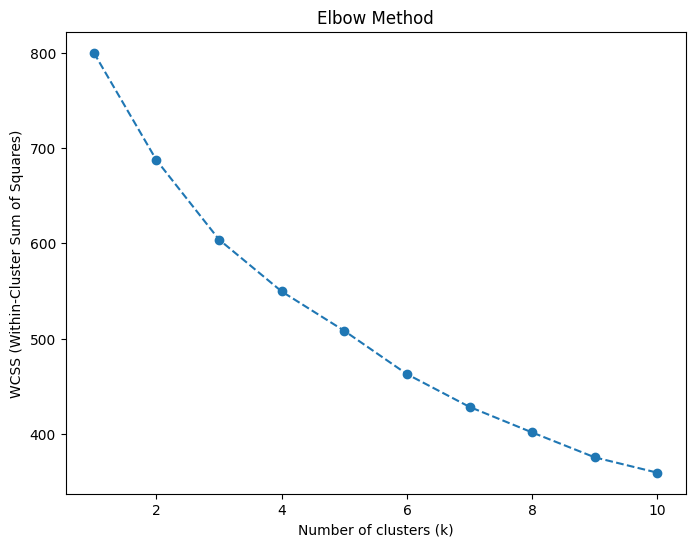

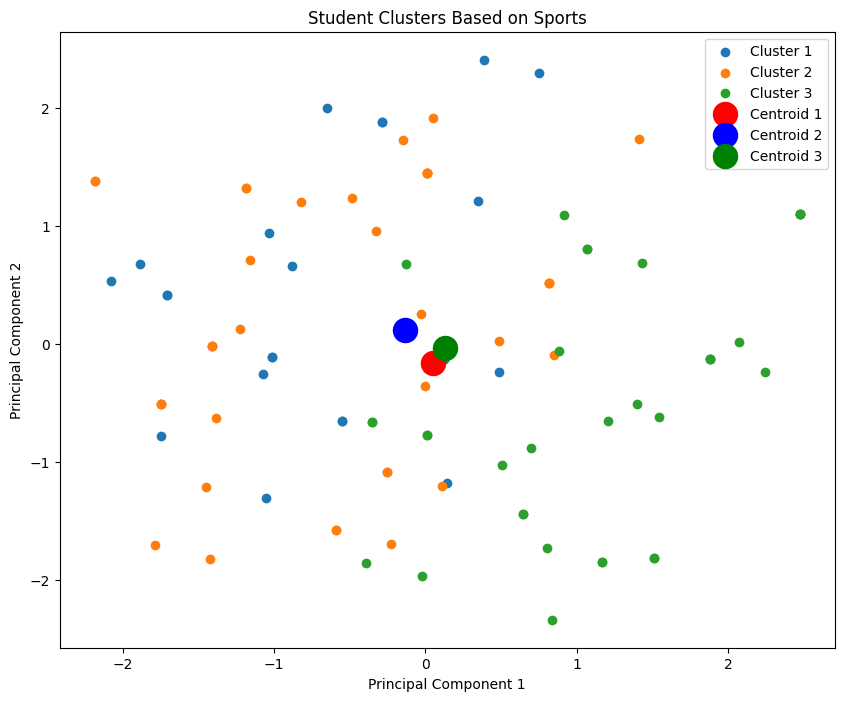

     ID  Cluster
0     1        1
1     2        0
2     3        2
3     4        2
4     5        1
..  ...      ...
95   96        1
96   97        0
97   98        1
98   99        2
99  100        2

[100 rows x 2 columns]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the student sports dataset
data = pd.read_csv('student_sports_data.csv')

# Split the 'Sports' and 'Time' columns into separate lists
data['Sports'] = data['Sports'].apply(lambda x: x.split(', '))
data['Time'] = data['Time'].apply(lambda x: [int(t) for t in x.split(', ')])

# Create a list of unique sports categories
unique_sports = list(set([sport for sports_list in data['Sports'] for sport in sports_list]))

# Create a binary matrix indicating which sports each student plays
binary_matrix = np.zeros((len(data), len(unique_sports)), dtype=int)
for i, sports_list in enumerate(data['Sports']):
    for j, sport in enumerate(unique_sports):
        if sport in sports_list:
            binary_matrix[i, j] = 1

# Standardize the binary matrix
scaler = StandardScaler()
scaled_data = scaler.fit_transform(binary_matrix)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, choose the optimal value of k (number of clusters)
k = 3  # Adjust this value based on your insights from the Elbow Method

# Perform K-means clustering with the chosen k
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the DataFrame
data['Cluster'] = clusters

# Reduce dimensionality for visualization (PCA)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters and centroids
plt.figure(figsize=(10, 8))
for cluster in range(k):
    plt.scatter(reduced_data[clusters == cluster, 0],
                reduced_data[clusters == cluster, 1],
                label=f'Cluster {cluster + 1}')

# Plot centroids with colors
for cluster, color in zip(range(k), ['red', 'blue', 'green']):
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], s=300, c=color, label=f'Centroid {cluster + 1}')

plt.title('Student Clusters Based on Sports')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Print the cluster assignments
print(data[['ID', 'Cluster']])
